# SALES DATA ANALYSIS MINI PROJECT
## By: Snigdha Labh, Electronics and Telecommunication 

### Task 1: Identifying and importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

### Task 2: Data loading and overview

In [2]:
#a.Load the dataset from a file
df = pd.read_excel('Superstore.xls')
print (df) 

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [4]:
City_cust = df.groupby(["City"]).size().reset_index(name='Number of people')
print(City_cust)


            City  Number of people
0       Aberdeen                 1
1        Abilene                 1
2          Akron                21
3    Albuquerque                14
4     Alexandria                16
..           ...               ...
526   Woonsocket                 4
527      Yonkers                15
528         York                 5
529      Yucaipa                 1
530         Yuma                 4

[531 rows x 2 columns]


In [4]:
#b. Look at the first 5 records of the data
five_rec = df.head()
print("The first 5 records of the data are:")
five_rec

The first 5 records of the data are:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# c.Print the columns contained in the data
print("The columns contained in the data are:")
for col in df.columns: 
    print(col) 

The columns contained in the data are:
Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [6]:
# d.Print the attributes like count , mean , max , min, standard deviation etc
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# e.Find out are there any missing or null values in the data for all columns
# df.dropna(axis=1)
df.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

### Task 3: Find out the per unit price from the data

In [8]:
# a. Convert date time field into pandas time object
df['Order Date'] = pd.to_datetime(df['Order Date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
#b. Find out the price per unit from the data and create a column for it in the same data
df["Price per unit"] = df["Sales"]/df["Quantity"]
# df.head()

### Task 4: Find out the monthly revenue and analyze the findings

In [10]:
# a.Create a column with Year and month field only give a suitable name to it
df["Year-Month"] = df['Order Date'].dt.strftime('%Y-%m')
# df.head()

In [11]:
# b.Create a separate dataset from the data which will have two columns, one which is created in step a of this task and 
# second the monthly sales / revenue
Monthly_sales_dataset = pd.DataFrame(df.groupby('Year-Month').sum()['Sales'])
Months = [Months for Months, df in df.groupby('Year-Month')]

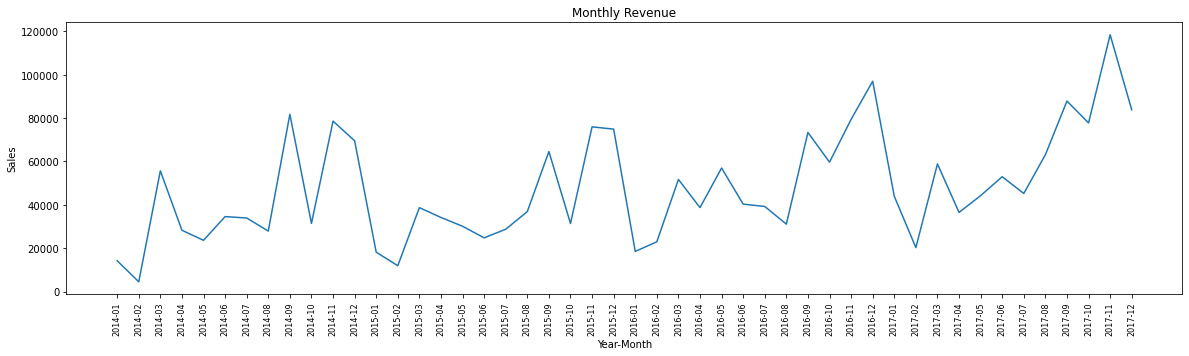

In [12]:
# c.Plot this dataset
# new_dataset.plot('Year-Month','Monthly Sales')
plt.figure(figsize=(20,5))
plt.plot(Months,Monthly_sales_dataset['Sales'])
plt.xticks(Months, rotation='vertical', size = 8)
plt.title('Monthly Revenue')
plt.ylabel('Sales')
plt.xlabel('Year-Month')
plt.show()

In [13]:
# d.Describe your analysis for the monthly revenue observations.
'''
 From the graph observations, the sales is not much consistent. The sales was the lowest in February,2014 and was the highest in November,2017. 
'''

'\n From the graph observations, the sales is not much consistent. The sales was the lowest in February,2014 and was the highest in November,2017. \n'

### Task 5: Find out the yearly revenue and analyze the findings

In [14]:
# a. Create a column with Year field only give a suitable name to it
df["Year"] = df['Order Date'].dt.strftime('%Y')


In [15]:
# b.Create a separate dataset from the data which will have two columns , one which is created in step a of 
# this task and second the yearly sales / revenue
Yearly_sales_dataset = pd.DataFrame(df.groupby('Year').sum()['Sales'])
Years = [Years for Years, df in df.groupby('Year')]

Text(0.5, 0, 'Year')

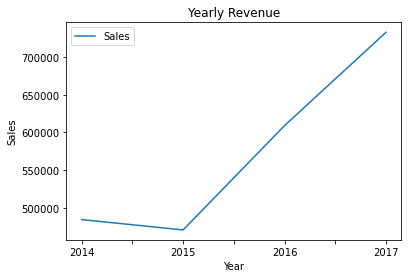

In [16]:
# c.Plot this dataset
Yearly_sales_dataset.plot()
plt.title('Yearly Revenue')
plt.ylabel('Sales')
plt.xlabel('Year')

In [17]:
# d.Describe your analysis for the yearly revenue observations. 
'''
 The sales were lowest in 2015 and it was highest in 2017, its sales were greater than 700000. 
The sales was first decreasing from 2014 to 2015 but it increased from 2015 to 2017
'''

'\n The sales were lowest in 2015 and it was highest in 2017, its sales were greater than 700000. \nThe sales was first decreasing from 2014 to 2015 but it increased from 2015 to 2017\n'

### Task 6: Finding out the monthly growth rate and analyse the findings

In [18]:
# a.Create a column in the monthly revenue dataset for monthly growth rate
Monthly_sales_dataset['Last_Month'] = np.roll(Monthly_sales_dataset['Sales'],1)
Monthly_sales_dataset = Monthly_sales_dataset.drop(Monthly_sales_dataset.index[0])
Monthly_sales_dataset['Growth Rate'] = (Monthly_sales_dataset['Sales']/Monthly_sales_dataset['Last_Month'])-1
#Now, since the monthly growth rate of first month cannot be found since we donot have it's previous month value.
#By default, python has put the last value in the column and rolled up over there. SO we need to remove that.



Text(0.5, 1.0, 'Monthly Growth Rate')

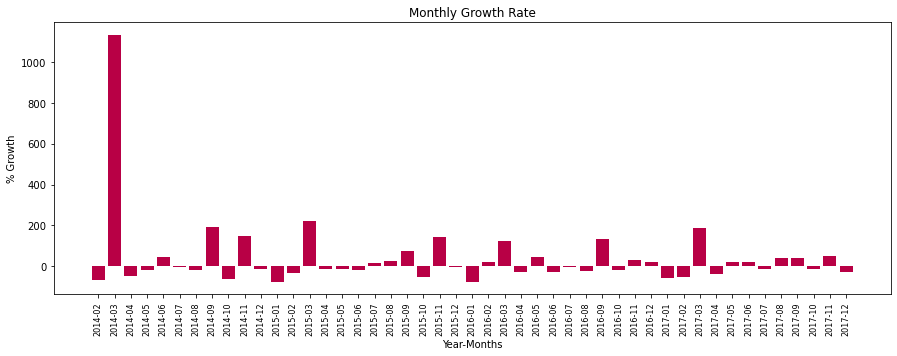

In [19]:
# c.Plot the findings
results = Monthly_sales_dataset.drop(columns = ["Sales", "Last_Month"])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
plt.figure(figsize=(15,5))
plt.bar(results['Months'],results['Growth Rate']*100, color = '#b80045')
plt.xticks(results['Months'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Year-Months')
plt.title("Monthly Growth Rate")

In [20]:
# b. Find out the maximum monthly growth rate
Monthly_sales_dataset.sort_values(by=['Growth Rate'], inplace=True, ascending=False)
Monthly_sales_dataset.head(1)

,Sales,Last_Month,Growth Rate
Year-Month,,,
2014-03,55691.009,4519.892,11.321314


In [21]:
# d.Describe the findings
'''
According to the observations from the graph, we can see that the monthly growth rate was good (positive) and in some duration it was also negative and zero. 
The monthly growth rate was the highest in March 2014. 
'''

'\nAccording to the observations from the graph, we can see that the monthly growth rate was good (positive) and in some duration it was also negative and zero. \nThe monthly growth rate was the highest in March 2014. \n'

### Task 7: Finding out the most and least sold product id

In [22]:
# a.Create a new dataset including the product ids and total quantities sold for that id
new_dataset1 = df[['Product ID','Quantity']].copy()
new_dataset1

,Product ID,Quantity
0,FUR-BO-10001798,2
1,FUR-CH-10000454,3
2,OFF-LA-10000240,2
3,FUR-TA-10000577,5
4,OFF-ST-10000760,2
...,...,...
9989,FUR-FU-10001889,3
9990,FUR-FU-10000747,2
9991,TEC-PH-10003645,2
9992,OFF-PA-10004041,4


In [23]:
# b.Find out the most sold product from the created dataset
most_sold = pd.DataFrame(new_dataset1.groupby('Product ID').sum()['Quantity'])
most_sold.sort_values(by=['Quantity'], inplace=True, ascending=False)
most_sold.head(1)

,Quantity
Product ID,
TEC-AC-10003832,75


### Task 8:

In [24]:
new_dataset2 = df[['Customer Name','Quantity']].copy()
new_dataset2

,Customer Name,Quantity
0,Claire Gute,2
1,Claire Gute,3
2,Darrin Van Huff,2
3,Sean O'Donnell,5
4,Sean O'Donnell,2
...,...,...
9989,Tom Boeckenhauer,3
9990,Dave Brooks,2
9991,Dave Brooks,2
9992,Dave Brooks,4


In [25]:
cust_name = pd.DataFrame(new_dataset2.groupby('Customer Name').sum()['Quantity'])
cust_name.sort_values(by=['Quantity'], inplace=True, ascending=False)
cust_name.head(1)

,Quantity
Customer Name,
Jonathan Doherty,150


### Task 9: Finding out the customer who bought most and least from us in terms of value


In [26]:
# a.Create a dataset containing name and sales generated by him
new_dataset3 = df[['Customer Name','Sales']].copy()


In [27]:
# b.Find out the customer name and sales, who bought maximum in value
cust_sales = pd.DataFrame(new_dataset3.groupby('Customer Name').sum()['Sales'])
cust_sales.sort_values(by=['Sales'], inplace=True, ascending=False)
cust_sales.head(1)

,Sales
Customer Name,
Sean Miller,25043.05


### Task 10: Finding out the majority and minority customer cities on basis of

In [28]:
# a. Number of customers
City_cust = df.groupby(["City"]).size().reset_index(name='Number of people')
City_cust.sort_values(by=['Number of people'], inplace=True, ascending=True)
# df.groupby(by=['City']).size().max()
# df['City'].value().max()
# df['City'].value_counts().idxmin()
arr = np.array(City_cust)

# For majority customer cities 
print('The Majority cities based on Number of Customer [City Name, Customer] are as follows: \n')
k=len(arr)-1
temp=0
while k>0 :
    if arr[k,1]== arr[:,1].max() :
        temp = temp + 1
    k=k-1
    
while temp>0 :
    print(arr[len(arr)-temp,:])
    temp =temp-1
    
# For minority
print('\n\n')
print('The Minority cities based on Number of Customer [City Name, Customer] are as follows: \n')

i=0
count=0
while i<len(arr) :
    if arr[i,1]== arr[:,1].min() :
        count = count + 1
    i=i+1


j=0
while j<count :
    txt=arr[j,:]
    j=j+1
    print(txt)


The Majority cities based on Number of Customer [City Name, Customer] are as follows: 

['New York City' 915]



The Minority cities based on Number of Customer [City Name, Customer] are as follows: 

['Aberdeen' 1]
['Ontario' 1]
['Davis' 1]
['Orland Park' 1]
['Danbury' 1]
['Ormond Beach' 1]
['Iowa City' 1]
['Pensacola' 1]
['Conway' 1]
['Conroe' 1]
['Commerce City' 1]
['Pico Rivera' 1]
['Port Orange' 1]
['Portage' 1]
['Citrus Heights' 1]
['Redding' 1]
['Cheyenne' 1]
['Redwood City' 1]
['Chapel Hill' 1]
['Champaign' 1]
['Cedar Rapids' 1]
['Rochester Hills' 1]
['Rock Hill' 1]
['Rogers' 1]
['Deer Park' 1]
['Romeoville' 1]
['Normal' 1]
['Murrieta' 1]
['Jefferson City' 1]
['Holyoke' 1]
['Jupiter' 1]
['Keller' 1]
['Kissimmee' 1]
['La Quinta' 1]
['Lake Elsinore' 1]
['Layton' 1]
['Hagerstown' 1]
['Linden' 1]
['Lindenhurst' 1]
['Littleton' 1]
['Grand Island' 1]
['Goldsboro' 1]
['Glenview' 1]
['Yucaipa' 1]
['Manhattan' 1]
['Margate' 1]
['Melbourne' 1]
['Missoula' 1]
['Missouri City' 1]
['Montebe

In [29]:
# b. Sales value
# Based on Sales value

City_Sales = df[['City','Sales']].copy()
City_Sales = pd.DataFrame(City_Sales.groupby('City').sum() ['Sales'])
# City_Sales
City_Sales.sort_values(by=['Sales'], inplace=True, ascending=True)
# print(City_Sales)

B = City_Sales.reset_index().values
# print(B)
# print(np.shape(B))

# For minority
print('The Minority cities based on Sales Value [City Name, Sales] are as follows: \n')
a=0
c=0
while a<len(B) :
    if B[a,1]== B[:,1].min() :
        c = c + 1
    a=a+1

x=0
while x<c :
    Q=B[x,:]
    x=x+1
    print(Q)
   
# For majority
print('\n\n')
print('The Majority cities based on Sales Value [City Name, Sales] are as follows: \n')
l=len(B)-1
t=0
while l>0 :
    if B[l,1]== B[:,1].max() :
        t = t + 1
    l=l-1

while t>0 :
    print(B[len(B)-t,:])
    t =t-1

The Minority cities based on Sales Value [City Name, Sales] are as follows: 

['Abilene' 1.3919999999999997]



The Majority cities based on Sales Value [City Name, Sales] are as follows: 

['New York City' 256368.161]


In [30]:
# c. Number of quantity sold
City_Quantity = df[['City','Quantity']].copy()
City_Quantity = pd.DataFrame(City_Quantity.groupby('City').sum() ['Quantity'])
# City_Quantity
City_Quantity.sort_values(by=['Quantity'], inplace=True, ascending=True)
# print(City_Quantity)

C = City_Quantity.reset_index().values
# print(np.shape(C))

# for majority
print('The Majority cities based on Number of quantity sold [City Name, Quantity] are as follows: \n')
n=len(C)-1
z=0
while n>0 :
    if C[n,1]== C[:,1].max() :
        z = z + 1
    n=n-1

while z>0 :
    print(C[len(C)-z,:])
    z =z-1
    
print('\n\n')   
# For minority
print('The Minority cities based on Number of quantity sold [City Name, Quantity] are as follows: \n')
m=0
v=0
while m<len(C) :
    if C[m,1]== C[:,1].min() :
        v = v + 1
    m=m+1

y=0
while y<v :
    S=C[y,:]
    y=y+1
    print(S)
   

The Majority cities based on Number of quantity sold [City Name, Quantity] are as follows: 

['New York City' 3417]



The Minority cities based on Number of quantity sold [City Name, Quantity] are as follows: 

['Port Orange' 1]
['Littleton' 1]
['Lindenhurst' 1]
['Elyria' 1]
['Iowa City' 1]
['Jupiter' 1]


### Task 11: Find out the most and least sold product category from the store

In [31]:
# a.Value based

Category_Value = df.groupby(["Category"]).size().reset_index(name='Total Value Sold')
Category_Value.sort_values(by=['Total Value Sold'], inplace=True, ascending=True)
# Category_Value
D = np.array(Category_Value)
# print(np.shape(D))
# print(D)

# For most sold
print('The most sold product category from the store [Category, Total Value Sold] are as follows: \n')
w=len(D)-1
g=0
while w>0 :
    if D[w,1]== D[:,1].max() :
        g = g + 1
    w=w-1

while g>0 :
    print(D[len(D)-g,:])
    g =g-1

print('\n\n')
# For least sold
print('The least sold product category from the store [Category, Total Value Sold] are as follows: \n')
r=0
e=0
while r<len(D) :
    if D[r,1]== D[:,1].min() :
        e = e + 1
    r=r+1

u=0
while u<e :
    R=D[u,:]
    u=u+1
    print(R)   

The most sold product category from the store [Category, Total Value Sold] are as follows: 

['Office Supplies' 6026]



The least sold product category from the store [Category, Total Value Sold] are as follows: 

['Technology' 1847]


In [32]:
# b.Quantity based

Category_Quantity = df[['Category','Quantity']].copy()
Category_Quantity = pd.DataFrame(Category_Quantity.groupby('Category').sum() ['Quantity'])
# Category_Quantity
Category_Quantity.sort_values(by=['Quantity'], inplace=True, ascending=True)
# print(Category_Quantity)

E = Category_Quantity.reset_index().values
# print(np.shape(E))
# print(E)

# For most sold
print('The most sold product category from the store [Category, Quantity] are as follows: \n')
ww=len(E)-1
gg=0
while ww>0 :
    if E[ww,1]== E[:,1].max() :
        gg = gg + 1
    ww=ww-1

while gg>0 :
    print(E[len(E)-gg,:])
    gg =gg-1

# For least sold
print('\n\n')
print('The least sold product category from the store [Category, Quantity] are as follows: \n')
rr=0
ee=0
while rr<len(E) :
    if E[rr,1]== E[:,1].min() :
        ee = ee + 1
    rr=rr+1

uu=0
while uu<ee :
    T=E[uu,:]
    uu=uu+1
    print(T)

The most sold product category from the store [Category, Quantity] are as follows: 

['Office Supplies' 22906]



The least sold product category from the store [Category, Quantity] are as follows: 

['Technology' 6939]


### Task 12: Find out the most and least sold product sub category from the store


In [33]:
# a.Value based

SubCategory_Value = df.groupby(["Sub-Category"]).size().reset_index(name='Total Sold')
SubCategory_Value.sort_values(by=['Total Sold'], inplace=True, ascending=True)
# SubCategory_Value
F = np.array(SubCategory_Value)
# print(np.shape(F))
# print(F)

# For most sold
print('The most sold product sub-category from the store [Sub-Category, Total Sold] are as follows: \n')
f=len(F)-1
ab=0
while f>0 :
    if F[f,1]== F[:,1].max() :
        ab = ab + 1
    f=f-1

while ab>0 :
    print(F[len(F)-ab,:])
    ab =ab-1

print('\n\n')
# For least sold
print('The least sold product sub-category from the store [Sub-Category, Total Sold] are as follows: \n')
o=0
h=0
while o<len(F) :
    if F[o,1]== F[:,1].min() :
        h = h + 1
    o=o+1

q=0
while q<h :
    L=F[q,:]
    q=q+1
    print(L)

The most sold product sub-category from the store [Sub-Category, Total Sold] are as follows: 

['Binders' 1523]



The least sold product sub-category from the store [Sub-Category, Total Sold] are as follows: 

['Copiers' 68]


In [34]:
# b.Quantity based

SubCategory_Quantity = df[['Sub-Category','Quantity']].copy()
SubCategory_Quantity = pd.DataFrame(SubCategory_Quantity.groupby('Sub-Category').sum() ['Quantity'])
# SubCategory_Quantity
SubCategory_Quantity.sort_values(by=['Quantity'], inplace=True, ascending=True)
# print(SubCategory_Quantity)

K = SubCategory_Quantity.reset_index().values
# print(np.shape(K))
# print(K)

# For most sold
print('The most sold product sub-category from the store [Sub-Category, Quantity] are as follows: \n')
ff=len(K)-1
cd=0
while ff>0 :
    if K[ff,1]== K[:,1].max() :
        cd = cd + 1
    ff=ff-1

while cd>0 :
    print(K[len(K)-cd,:])
    cd =cd-1

    
# For least sold
print('\n\n')
print('The least sold product sub-category from the store [Sub-Category, Quantity] are as follows: \n')
oo=0
hh=0
while oo<len(K) :
    if K[oo,1]== K[:,1].min() :
        hh = hh + 1
    oo=oo+1

qq=0
while qq<hh :
    O=K[qq,:]
    qq=qq+1
    print(O)

The most sold product sub-category from the store [Sub-Category, Quantity] are as follows: 

['Binders' 5974]



The least sold product sub-category from the store [Sub-Category, Quantity] are as follows: 

['Copiers' 234]


<div align="center"> <font size="6"> <b>END OF PROJECT </font> </div>